In [1]:
!pip install pandas numpy matplotlib rdkit

In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import SVG
from collections import Counter

In [3]:
chembl_data = pd.read_csv(r"C:\Users\arthu\OneDrive\Desktop\denovoexercises\Exercises\chembl_filtr.csv", delimiter=';')

In [4]:
sampled = chembl_data. sample(n=100000, random_state=42)
sampled = sampled[sampled['Smiles'].apply(lambda x: isinstance(x, str))]
sampled = sampled[sampled['Smiles'].notna()]

In [5]:
nBits = 2048
radius = 2
fpgen = AllChem.GetMorganGenerator(radius=radius, fpSize=nBits)
bit_info_map = []  

In [13]:
bit_info_map

[(<rdkit.Chem.rdchem.Mol at 0x1a8bcc00900>,
  {1: ((17, 0),),
   13: ((6, 1), (8, 1)),
   25: ((14, 2),),
   80: ((6, 0), (7, 0), (8, 0)),
   102: ((4, 2),),
   140: ((12, 1), (15, 1)),
   235: ((2, 2), (21, 2)),
   283: ((18, 1), (19, 1)),
   322: ((4, 1),),
   513: ((11, 2),),
   538: ((16, 2),),
   689: ((11, 1),),
   695: ((5, 0), (9, 0)),
   718: ((3, 2), (20, 2)),
   725: ((13, 0), (16, 0)),
   768: ((9, 2),),
   807: ((11, 0), (14, 0)),
   836: ((9, 1),),
   902: ((16, 1),),
   1034: ((5, 2),),
   1057: ((0, 0), (18, 0), (19, 0)),
   1152: ((10, 0),),
   1171: ((12, 0), (15, 0), (10, 1)),
   1311: ((17, 1),),
   1380: ((1, 0), (4, 0)),
   1452: ((5, 1),),
   1538: ((22, 0),),
   1596: ((8, 2),),
   1599: ((14, 1),),
   1627: ((13, 1),),
   1684: ((13, 2),),
   1722: ((0, 1),),
   1750: ((2, 1), (3, 1), (20, 1), (21, 1)),
   1753: ((7, 2),),
   1823: ((1, 1),),
   1873: ((2, 0), (3, 0), (20, 0), (21, 0), (6, 2)),
   1911: ((7, 1),),
   1920: ((1, 2),),
   1960: ((17, 2),),
   200

In [6]:
for smiles in sampled['Smiles']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ao = AllChem.AdditionalOutput()
        ao.CollectBitInfoMap()  
        fpgen.GetFingerprint(mol, additionalOutput=ao)
        bit_info_map.append((mol, ao.GetBitInfoMap()))  


In [7]:
bit_counter = Counter()
for _, bi in bit_info_map:
    for bit, occurrences in bi.items():
        bit_counter[bit] += len(occurrences)

In [8]:
bit_counter

Counter({1873: 645360,
         1380: 524624,
         1750: 354766,
         926: 198517,
         80: 153219,
         1057: 151448,
         1088: 149287,
         650: 137602,
         807: 125123,
         1199: 96492,
         378: 92851,
         1917: 75336,
         935: 74962,
         875: 74656,
         1019: 66955,
         1152: 61767,
         695: 56500,
         1480: 54726,
         1325: 39066,
         1855: 37545,
         1928: 34752,
         389: 34439,
         1722: 34084,
         656: 34034,
         1452: 33791,
         314: 33215,
         1028: 31121,
         841: 29125,
         1476: 24921,
         1911: 24792,
         1683: 24309,
         1: 23590,
         1536: 23576,
         1754: 22554,
         718: 21907,
         1160: 21611,
         294: 20984,
         1114: 20877,
         310: 20180,
         561: 20109,
         1060: 20068,
         322: 18959,
         1357: 18943,
         896: 18936,
         1039: 18836,
         1453: 18500,
 

In [9]:
top_10_bits = bit_counter.most_common(10)

In [10]:
tpls = []
for bit, _ in top_10_bits:
    for mol, bi in bit_info_map:
        if bit in bi:
            tpls.append((mol, bit, bi, 0))  
            break

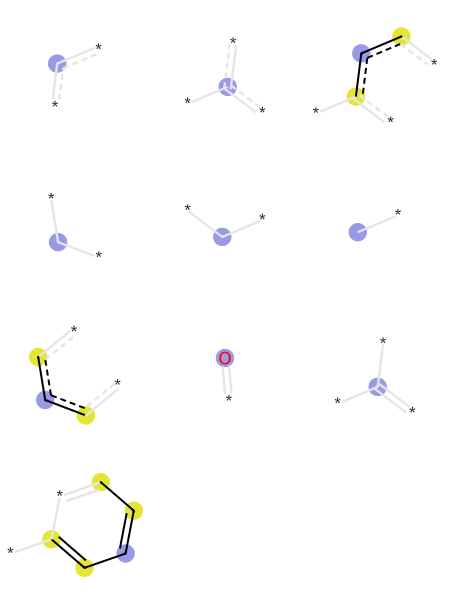

In [11]:
Draw.DrawMorganBits(tpls, useSVG=True)

In [12]:
nBits = 2048
radius = 2
fpgen = AllChem.GetMorganGenerator(radius=radius, fpSize=nBits)
bit_info_map = []  
for smiles in sampled['Smiles']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ao = AllChem.AdditionalOutput()
        ao.CollectBitInfoMap()  
        fpgen.GetFingerprint(mol, additionalOutput=ao)
        bit_info_map.append((mol, ao.GetBitInfoMap()))  
bit_counter = Counter()
for _, bi in bit_info_map:
    for bit, occurrences in bi.items():
        bit_counter[bit] += len(occurrences)
top_10_bits = bit_counter.most_common(10)
tpls = []
for bit, _ in top_10_bits:
    for mol, bi in bit_info_map:
        if bit in bi:
            tpls.append((mol, bit, bi, 0))  
            break